# Data exploration

This short notebook displays the images with which we are working, and illustrates the data augmentation techniques we used to train our model. The original data can be found on the [challenge webpage](https://www.kaggle.com/c/mva-mash-kernel-methods-2021-2022).

## The dataset

Let us display some images from the dataset.

In [2]:
from src.utils import get_data, array_to_tensor, show_images

In [3]:
Xtr, Xte, Ytr = get_data()
print("X train: ", Xtr.shape)
print("X test:  ", Xte.shape)
print("Y train: ", Ytr.shape)

X train:  (5000, 3072)
X test:   (2000, 3072)
Y train:  (5000,)


In [4]:
print(f"There are {Ytr.max()+1} classes, from {Ytr.min()} to {Ytr.max()}")

There are 10 classes, from 0 to 9


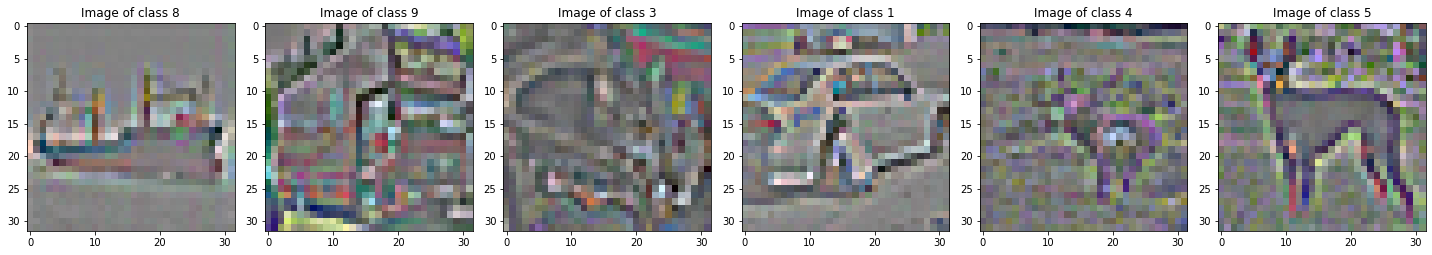

In [5]:
Xtr_tensor = array_to_tensor(Xtr)  # reshape the 1-dim vectors into image tensors
show_images(Xtr_tensor, Ytr)

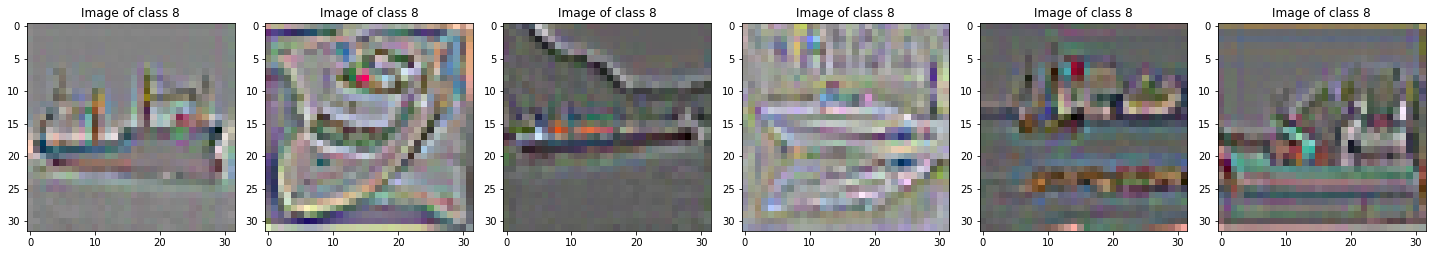

In [6]:
# show images of boat only
show_images(Xtr_tensor[Ytr==8], Ytr[Ytr==8])

In [12]:
import numpy as np
print("Repartition of classes:", np.histogram(Ytr)[0])

Repartition of classes: [500 500 500 500 500 500 500 500 500 500]


## Data augmentation

Let us now compute and display the augmented data we used to train our model.

In [6]:
from torchvision import transforms
from utils import augment_dataset

transform = [
    transforms.RandomHorizontalFlip(p=.5),
    transforms.RandomAffine(degrees=(0,10), translate=(0.1,0.2), scale=(0.8,1.2)),
]
Xtr_augm, Ytr_augm = augment_dataset(Xtr, Ytr, repeat=4, transform=transform)

Augmenting: 100%|██████████| 20000/20000 [00:20<00:00, 959.38it/s] 


In [7]:
print(f"Number of images (original):  {Xtr.shape[0]}")
print(f"Number of images (augmented): {Xtr_augm.shape[0]}")

Number of images (original):  5000
Number of images (augmented): 25000


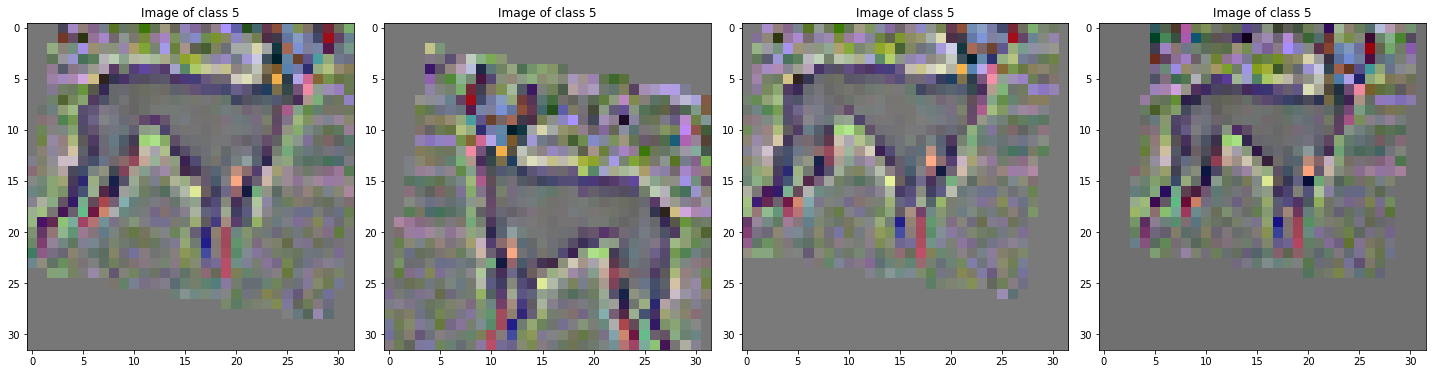

In [8]:
Xtr_augm_tensor = array_to_tensor(Xtr_augm)
show_images(Xtr_augm_tensor[5000+20:], Ytr_augm[5000+20:], nb_img=4)